In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns',None)
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [254]:
df = pd.read_csv(r'DIAssignment.csv')

In [ ]:
# age_scaled  - Age of the bike (min-max Scaled)
# model_type  - Model of the bike
# no_of_riding_sessions - Number of times the bike was taken out to ride in past 3 months
# no_of_charging_sessions - Number of times the bike was put to charge in the past 3 months
# charging_behaviour - This captures how well the bike was treated in its charging cycles. This is a categorical variable. (Good, Decent or Bad)
# mileage_km_per_soc - The mileage the bike provides. ”km_per_soc” is the unit for mileage for electric bike (equivalent to km_per_litre” for a petrol bike)


In [255]:
df

,Unnamed: 0,bike_id,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0,bike_21062,0.261905,Model_4,305,59,Decent,0.976820
1,1,bike_11582,0.261905,Model_4,136,11,Decent,0.687972
2,2,bike_19932,0.261905,Model_4,209,90,Bad,0.475168
3,3,bike_21418,0.261905,Model_4,221,17,Good,0.756067
4,4,bike_6349,0.261905,Model_4,1778,91,Good,0.986102
...,...,...,...,...,...,...,...,...
2843,2843,bike_6891,0.261905,Model_4,6,20,Bad,0.853946
2844,2844,bike_28319,0.261905,Model_4,1537,158,Bad,0.919663
2845,2845,bike_8880,0.261905,Model_4,80,13,Decent,0.875454
2846,2846,bike_12895,0.809524,Model_1,1141,121,Decent,0.931201


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2848 non-null   int64  
 1   bike_id                  2848 non-null   object 
 2   age_scaled               2848 non-null   float64
 3   model_type               2848 non-null   object 
 4   no_of_riding_sessions    2848 non-null   int64  
 5   no_of_charging_sessions  2848 non-null   int64  
 6   charging_behavior        2848 non-null   object 
 7   mileage_km_per_soc       2848 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 178.1+ KB


In [257]:
df.describe()

,Unnamed: 0,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,1423.500000,0.213617,895.797402,108.694522,0.886865
std,822.291108,0.206463,604.446765,81.673720,0.143127
min,0.000000,0.000000,6.000000,3.000000,0.001654
25%,711.750000,0.071429,449.000000,48.000000,0.806110
50%,1423.500000,0.142857,759.000000,93.000000,0.878671
75%,2135.250000,0.309524,1216.000000,144.000000,0.957420
max,2847.000000,0.976190,5140.000000,762.000000,1.979403


In [258]:
df.isna().sum()

Unnamed: 0                 0
bike_id                    0
age_scaled                 0
model_type                 0
no_of_riding_sessions      0
no_of_charging_sessions    0
charging_behavior          0
mileage_km_per_soc         0
dtype: int64

In [259]:
df.duplicated().sum()

0

In [260]:
df.model_type.value_counts()

Model_4    1982
Model_3     437
Model_2     291
Model_1     138
Name: model_type, dtype: int64

In [261]:
df.charging_behavior.value_counts()

Decent    1816
Bad        520
Good       512
Name: charging_behavior, dtype: int64

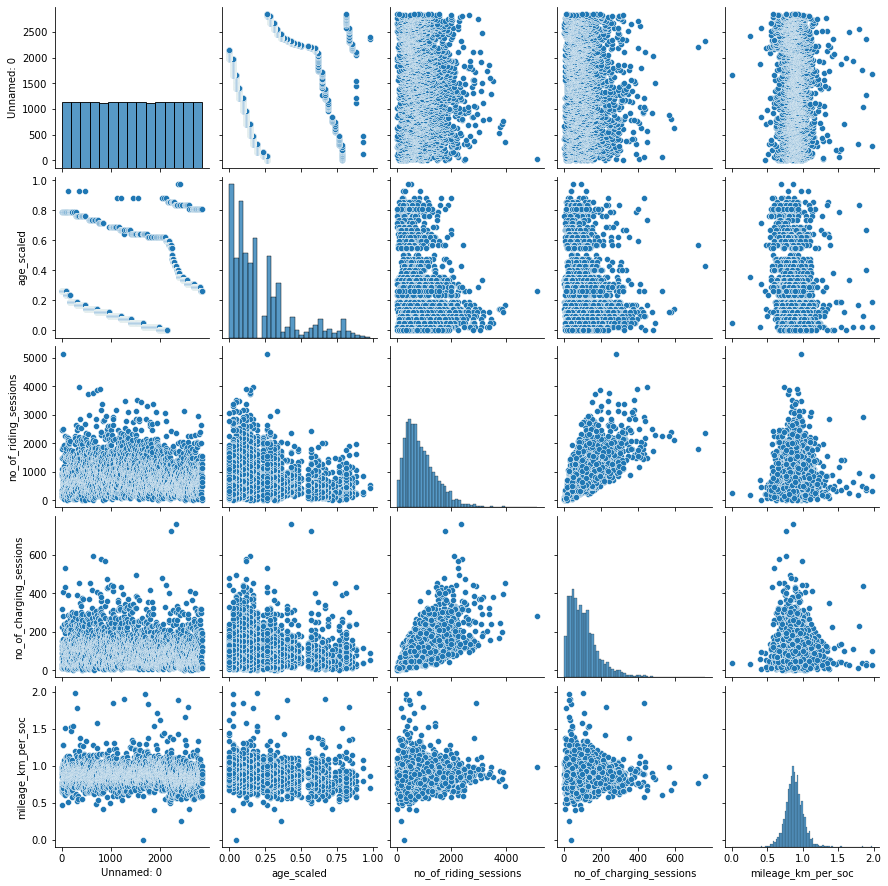

In [262]:
sns.pairplot(df)

In [263]:
df.columns

Index(['Unnamed: 0', 'bike_id', 'age_scaled', 'model_type',
       'no_of_riding_sessions', 'no_of_charging_sessions', 'charging_behavior',
       'mileage_km_per_soc'],
      dtype='object')

In [264]:
df[:3]

,Unnamed: 0,bike_id,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0,bike_21062,0.261905,Model_4,305,59,Decent,0.976820
1,1,bike_11582,0.261905,Model_4,136,11,Decent,0.687972
2,2,bike_19932,0.261905,Model_4,209,90,Bad,0.475168


In [265]:
df.drop(columns='bike_id',inplace=True)

In [266]:
df.drop(columns='Unnamed: 0',inplace=True)

In [267]:
df.model_type.value_counts()

Model_4    1982
Model_3     437
Model_2     291
Model_1     138
Name: model_type, dtype: int64

In [268]:
# df.model_type.map({'Model_4':4,'Model_3':3,'Model_2':2,'Model_1':1},inplace=True)
df.model_type.replace({'Model_4':4,'Model_3':3,'Model_2':2,'Model_1':1},inplace=True)

In [269]:
df.charging_behavior

0       Decent
1       Decent
2          Bad
3         Good
4         Good
         ...  
2843       Bad
2844       Bad
2845    Decent
2846    Decent
2847    Decent
Name: charging_behavior, Length: 2848, dtype: object

In [270]:
df.charging_behavior.replace({'Bad':0,'Decent':1,'Good':2},inplace=True)

In [271]:
df[:3]

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0.261905,4,305,59,1,0.976820
1,0.261905,4,136,11,1,0.687972
2,0.261905,4,209,90,0,0.475168


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_scaled               2848 non-null   float64
 1   model_type               2848 non-null   int64  
 2   no_of_riding_sessions    2848 non-null   int64  
 3   no_of_charging_sessions  2848 non-null   int64  
 4   charging_behavior        2848 non-null   int64  
 5   mileage_km_per_soc       2848 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 133.6 KB


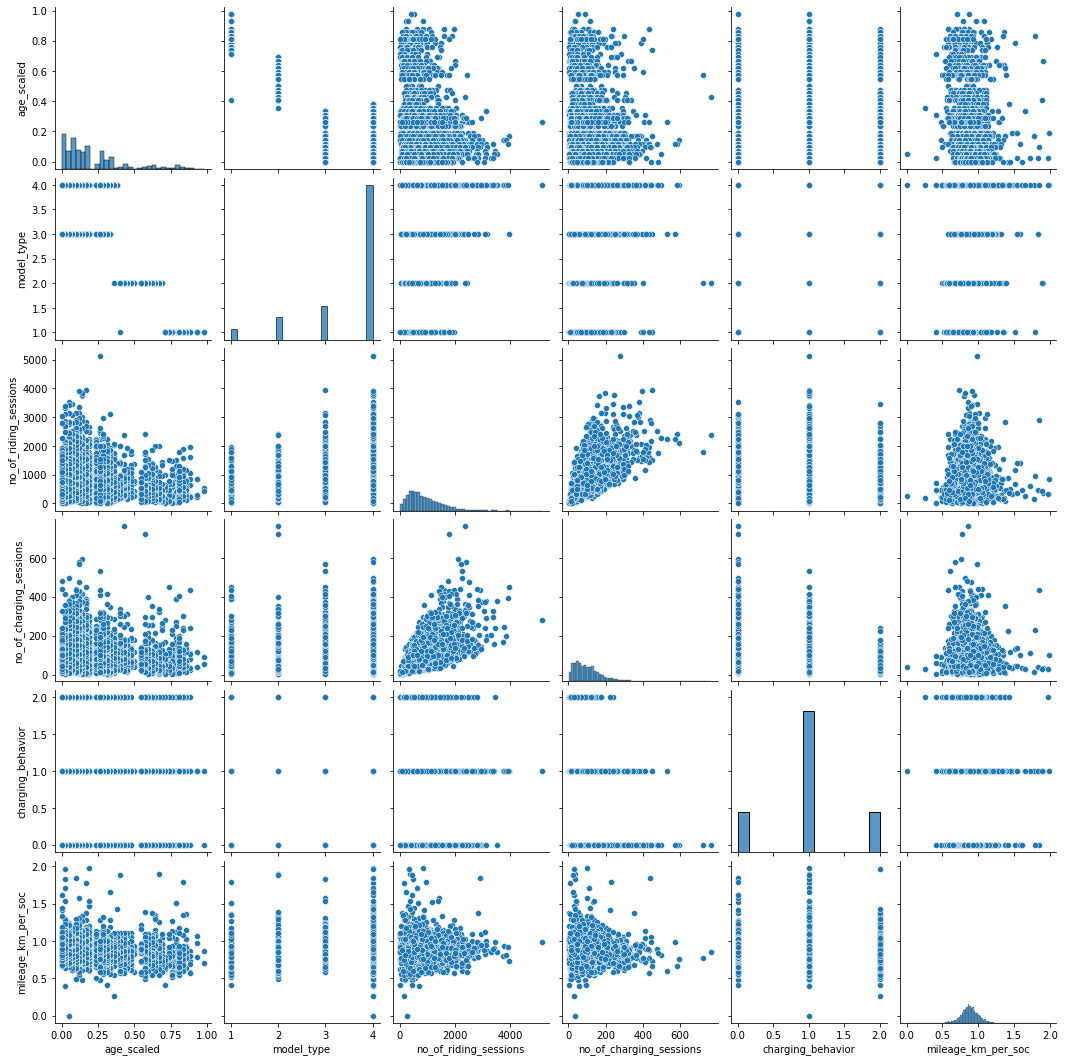

In [273]:
sns.pairplot(df)

<AxesSubplot:xlabel='age_scaled', ylabel='Density'>

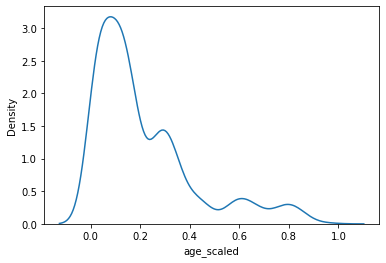

In [274]:
sns.kdeplot(df.age_scaled)         

<AxesSubplot:xlabel='no_of_riding_sessions', ylabel='Density'>

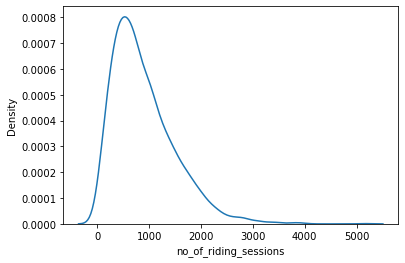

In [275]:
sns.kdeplot(df.no_of_riding_sessions)  

<AxesSubplot:xlabel='no_of_charging_sessions', ylabel='Density'>

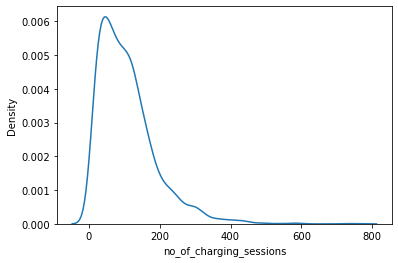

In [276]:
sns.kdeplot(df.no_of_charging_sessions)  

<AxesSubplot:xlabel='mileage_km_per_soc', ylabel='Density'>

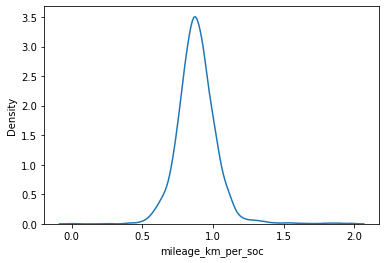

In [277]:
sns.kdeplot(df.mileage_km_per_soc) 

### Dealing with Outliers

<AxesSubplot:>

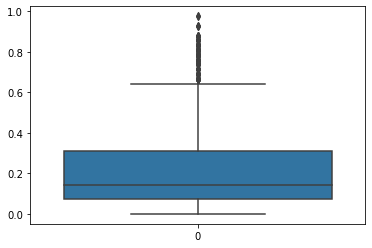

In [278]:
sns.boxplot(data = df.age_scaled)

In [279]:
q1,q3 = np.percentile(df.age_scaled,[25,75])
iqr = q3-q1
f1 = q1-(1.5*iqr)
f2 = q3+(1.5*iqr)
print(f1,f2)

-0.2857142857142857 0.6666666666666665


In [280]:
def fill_outliers(df,variables):
    df[variables] = np.where(df[variables]<f1,f1,np.where(df[variables]>f2,f2,df[variables]))
    return df[variables]
fill_outliers(df,'age_scaled')

0       0.261905
1       0.261905
2       0.261905
3       0.261905
4       0.261905
          ...   
2843    0.261905
2844    0.261905
2845    0.261905
2846    0.666667
2847    0.261905
Name: age_scaled, Length: 2848, dtype: float64

<AxesSubplot:>

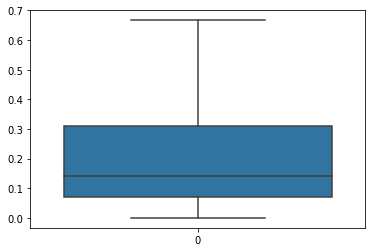

In [281]:
sns.boxplot(data = df.age_scaled)

In [282]:
df.columns

Index(['age_scaled', 'model_type', 'no_of_riding_sessions',
       'no_of_charging_sessions', 'charging_behavior', 'mileage_km_per_soc'],
      dtype='object')

In [101]:
# def min_max_fence(data):
#     q1,q3 = np.percentile(data,[25,75])
#     iqr = q3-q1
#     l1 = q1-(1.5*iqr)
#     l2 = q3+(1.5*iqr)
#     print(l1,l2)

# min_max_fence(df.age_scaled)

In [ ]:
# def min_max_fence1(df,variables):
#     q1,q3 = np.percentile(df[variables],[25,75])
#     iqr = q3-q1
#     f11 = q1-(1.5*iqr)
#     f22 = q3+(1.5*iqr)
#     return f11,f22
# min_max_fence1(df,'no_of_charging_sessions')
# print('min fence, f1: ',f11, 'max fence,f2: ',f22 )

<AxesSubplot:>

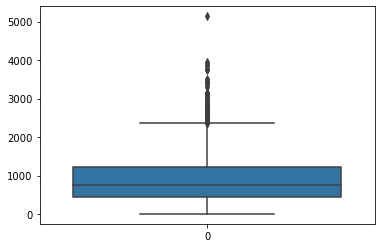

In [283]:
sns.boxplot(data=df.no_of_riding_sessions)

In [284]:
q1,q3 = np.percentile(df.no_of_riding_sessions,[25,75])
iqr = q3-q1
f1 = q1-(1.5*iqr)
f2 = q3+(1.5*iqr)
print(f1,f2)

-701.5 2366.5


In [285]:
def fill_outliers(df,variables):
    df[variables] = np.where(df[variables]<f1,f1,np.where(df[variables]>f2,f2,df[variables]))
    return df[variables]
fill_outliers(df,'no_of_riding_sessions')

0        305.0
1        136.0
2        209.0
3        221.0
4       1778.0
         ...  
2843       6.0
2844    1537.0
2845      80.0
2846    1141.0
2847     636.0
Name: no_of_riding_sessions, Length: 2848, dtype: float64

<AxesSubplot:>

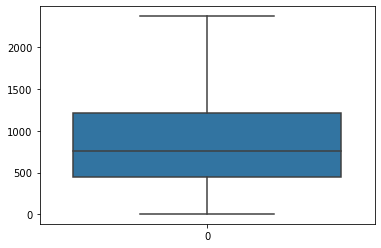

In [286]:
sns.boxplot(data=df.no_of_riding_sessions)

In [79]:
# def outliers(df,variables):
#     outliers_1 = np.where(df[variables]<f1,True,np.where(df[variables]>f2,True,False))
#     outliers_removed = df.loc[~(outliers_1),]
#     return outliers_removed
# outliers(df,'age_scaled')

<AxesSubplot:>

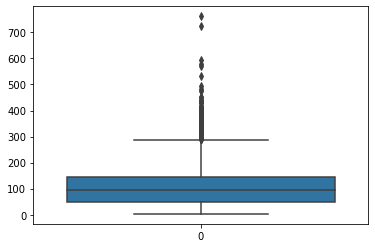

In [287]:
sns.boxplot(data=df.no_of_charging_sessions)

In [288]:
q1,q3 = np.percentile(df.no_of_charging_sessions,[25,75])
iqr = q3-q1
f1 = q1-(1.5*iqr)
f2 = q3+(1.5*iqr)
print(f1,f2)

-96.0 288.0


In [289]:
def fill_outliers(df,variables):
    df[variables] = np.where(df[variables]<f1,f1,np.where(df[variables]>f2,f2,df[variables]))
    return df[variables]
fill_outliers(df,'no_of_charging_sessions')

0        59.0
1        11.0
2        90.0
3        17.0
4        91.0
        ...  
2843     20.0
2844    158.0
2845     13.0
2846    121.0
2847    101.0
Name: no_of_charging_sessions, Length: 2848, dtype: float64

<AxesSubplot:>

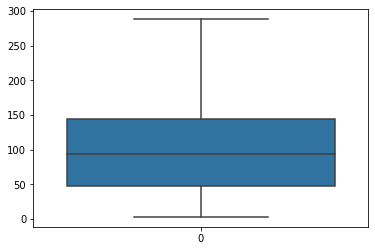

In [290]:
sns.boxplot(data=df.no_of_charging_sessions)

### Skewed data - Transformed to Normal Distribution

<AxesSubplot:xlabel='age_scaled', ylabel='Density'>

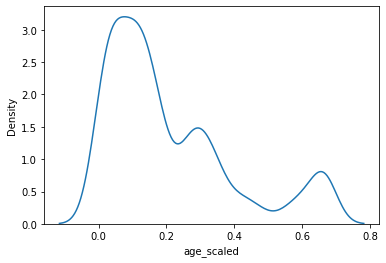

In [291]:
sns.kdeplot(df.age_scaled)

<AxesSubplot:xlabel='age_scaled', ylabel='Density'>

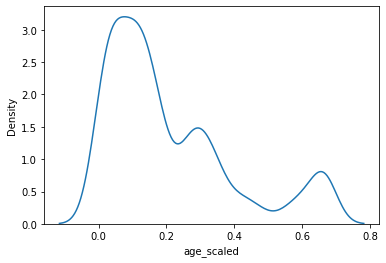

In [292]:
sns.kdeplot(df.age_scaled)

<AxesSubplot:xlabel='no_of_riding_sessions', ylabel='Density'>

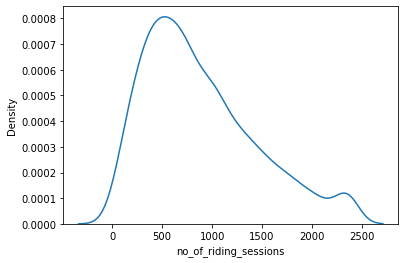

In [293]:
sns.kdeplot(df.no_of_riding_sessions)

<AxesSubplot:xlabel='no_of_charging_sessions', ylabel='Density'>

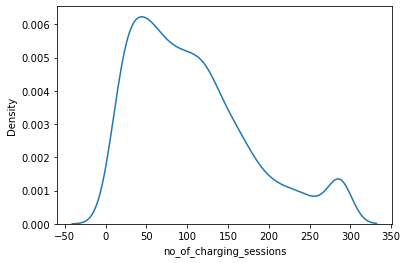

In [294]:
sns.kdeplot(df.no_of_charging_sessions)

In [295]:
df[:3]

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0.261905,4,305.0,59.0,1,0.976820
1,0.261905,4,136.0,11.0,1,0.687972
2,0.261905,4,209.0,90.0,0,0.475168


# Scaling

In [296]:
min_max = MinMaxScaler()

In [297]:
data = df.iloc[:,[1,2,3,4]]
data[:3]

,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior
0,4,305.0,59.0,1
1,4,136.0,11.0,1
2,4,209.0,90.0,0


In [298]:
min_max.fit_transform(data)

array([[1.        , 0.12666808, 0.19649123, 0.5       ],
       [1.        , 0.05507308, 0.02807018, 0.5       ],
       [1.        , 0.08599873, 0.30526316, 0.        ],
       ...,
       [1.        , 0.03134929, 0.03508772, 0.5       ],
       [0.        , 0.48083033, 0.41403509, 0.5       ],
       [1.        , 0.26689261, 0.34385965, 0.5       ]])

In [299]:
df1 = pd.DataFrame(min_max.fit_transform(data))
df1

,0,1,2,3
0,1.0,0.126668,0.196491,0.5
1,1.0,0.055073,0.028070,0.5
2,1.0,0.085999,0.305263,0.0
3,1.0,0.091082,0.049123,1.0
4,1.0,0.750688,0.308772,1.0
...,...,...,...,...
2843,1.0,0.000000,0.059649,0.0
2844,1.0,0.648591,0.543860,0.0
2845,1.0,0.031349,0.035088,0.5
2846,0.0,0.480830,0.414035,0.5


In [300]:
df1.rename({0:'model_type',1:'no_of_riding_sessions',2:'no_of_charging_sessions',3:'charging_behavior'},axis=1,inplace=True)

In [213]:
df1[:]

,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior
0,1.0,0.126668,0.196491,0.5
1,1.0,0.055073,0.028070,0.5
2,1.0,0.085999,0.305263,0.0
3,1.0,0.091082,0.049123,1.0
4,1.0,0.750688,0.308772,1.0
...,...,...,...,...
2843,1.0,0.000000,0.059649,0.0
2844,1.0,0.648591,0.543860,0.0
2845,1.0,0.031349,0.035088,0.5
2846,0.0,0.480830,0.414035,0.5


In [301]:
df1.model_type.value_counts()

1.000000    1982
0.666667     437
0.333333     291
0.000000     138
Name: model_type, dtype: int64

In [302]:
df1[:3]

,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior
0,1.0,0.126668,0.196491,0.5
1,1.0,0.055073,0.028070,0.5
2,1.0,0.085999,0.305263,0.0


In [303]:
df_mod = pd.concat([df[['age_scaled']],df1,df[['mileage_km_per_soc']]],axis=1)
df_mod[:3]

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0.261905,1.0,0.126668,0.196491,0.5,0.976820
1,0.261905,1.0,0.055073,0.028070,0.5,0.687972
2,0.261905,1.0,0.085999,0.305263,0.0,0.475168


In [304]:
df_mod.model_type.value_counts()

1.000000    1982
0.666667     437
0.333333     291
0.000000     138
Name: model_type, dtype: int64

In [305]:
df_mod.shape

(2848, 6)

# Model Building

In [306]:
X = df_mod.drop(columns=['mileage_km_per_soc'])
X

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior
0,0.261905,1.0,0.126668,0.196491,0.5
1,0.261905,1.0,0.055073,0.028070,0.5
2,0.261905,1.0,0.085999,0.305263,0.0
3,0.261905,1.0,0.091082,0.049123,1.0
4,0.261905,1.0,0.750688,0.308772,1.0
...,...,...,...,...,...
2843,0.261905,1.0,0.000000,0.059649,0.0
2844,0.261905,1.0,0.648591,0.543860,0.0
2845,0.261905,1.0,0.031349,0.035088,0.5
2846,0.666667,0.0,0.480830,0.414035,0.5


In [307]:
y = df_mod.mileage_km_per_soc
y

0       0.976820
1       0.687972
2       0.475168
3       0.756067
4       0.986102
          ...   
2843    0.853946
2844    0.919663
2845    0.875454
2846    0.931201
2847    0.891091
Name: mileage_km_per_soc, Length: 2848, dtype: float64

In [308]:
df_mod.corr()

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
age_scaled,1.000000,-0.740231,-0.228023,-0.067848,-0.016101,-0.202666
model_type,-0.740231,1.000000,0.172127,0.035312,0.075668,0.117908
no_of_riding_sessions,-0.228023,0.172127,1.000000,0.698492,-0.233189,0.030405
no_of_charging_sessions,-0.067848,0.035312,0.698492,1.000000,-0.489997,-0.023119
charging_behavior,-0.016101,0.075668,-0.233189,-0.489997,1.000000,-0.036910
mileage_km_per_soc,-0.202666,0.117908,0.030405,-0.023119,-0.036910,1.000000


<AxesSubplot:>

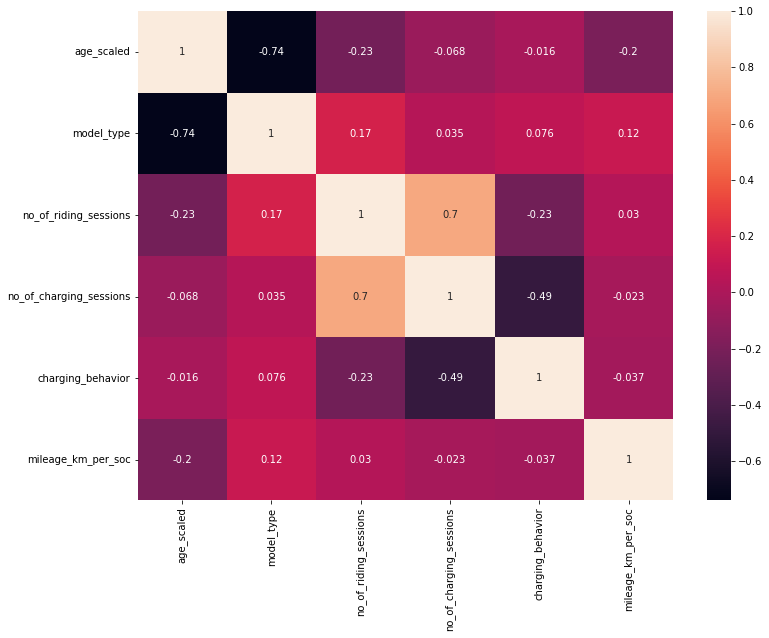

In [309]:
plt.figure(figsize=(12,9))
sns.heatmap(df_mod.corr(),annot=True)

In [310]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [311]:
X_train[:3]

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior
133,0.238095,1.000000,0.898115,0.992982,0.0
152,0.238095,1.000000,0.255878,0.245614,1.0
2303,0.428571,0.333333,0.210125,0.400000,0.0


In [312]:
X_test[:3]

,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior
110,0.238095,1.000000,0.939631,0.470175,0.0
1694,0.642857,0.333333,0.332557,0.505263,1.0
2597,0.309524,1.000000,0.255878,0.347368,0.5


In [313]:
y_train[:3]

133     0.925512
152     0.743069
2303    0.866159
Name: mileage_km_per_soc, dtype: float64

In [314]:
y_test[:3]

110     1.096345
1694    0.947277
2597    0.718377
Name: mileage_km_per_soc, dtype: float64

In [315]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [316]:
y_pred = lr.predict(X_test)

In [318]:
print('train score:', lr.score(X_train,y_train)*100)
print('test score:', lr.score(X_test,y_test)*100)

train score: 5.086592544350987
test score: 4.157256425016975


In [319]:
r2_score(y_test,y_pred)

0.04157256425016975

In [320]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [321]:
y_pred = dt.predict(X_test)

In [322]:
print('train score:', dt.score(X_train,y_train)*100)
print('test score:', dt.score(X_test,y_test)*100)

train score: 98.21123000947355
test score: -123.4543388040103


In [323]:
r2_score(y_test,y_pred)

-1.234543388040103

In [324]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [325]:
y_pred = rf.predict(X_test)

In [329]:
print('train score:', rf.score(X_train,y_train)*100)
print('test score:', rf.score(X_test,y_test)*100)

train score: 82.88877248773792
test score: -5.7459043315225555


In [332]:
cv_score = cross_val_score(rf,X_train,y_train,cv=5)
cv_score

array([-0.19582882, -0.07782614, -0.20186257, -0.09405025, -0.03066746])

In [333]:
cv_score.mean()*100

-12.004704643522652

<AxesSubplot:xlabel='mileage_km_per_soc', ylabel='Density'>

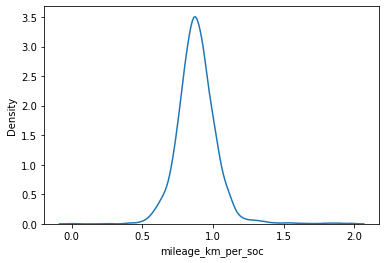

In [336]:
sns.kdeplot(df_mod.mileage_km_per_soc)

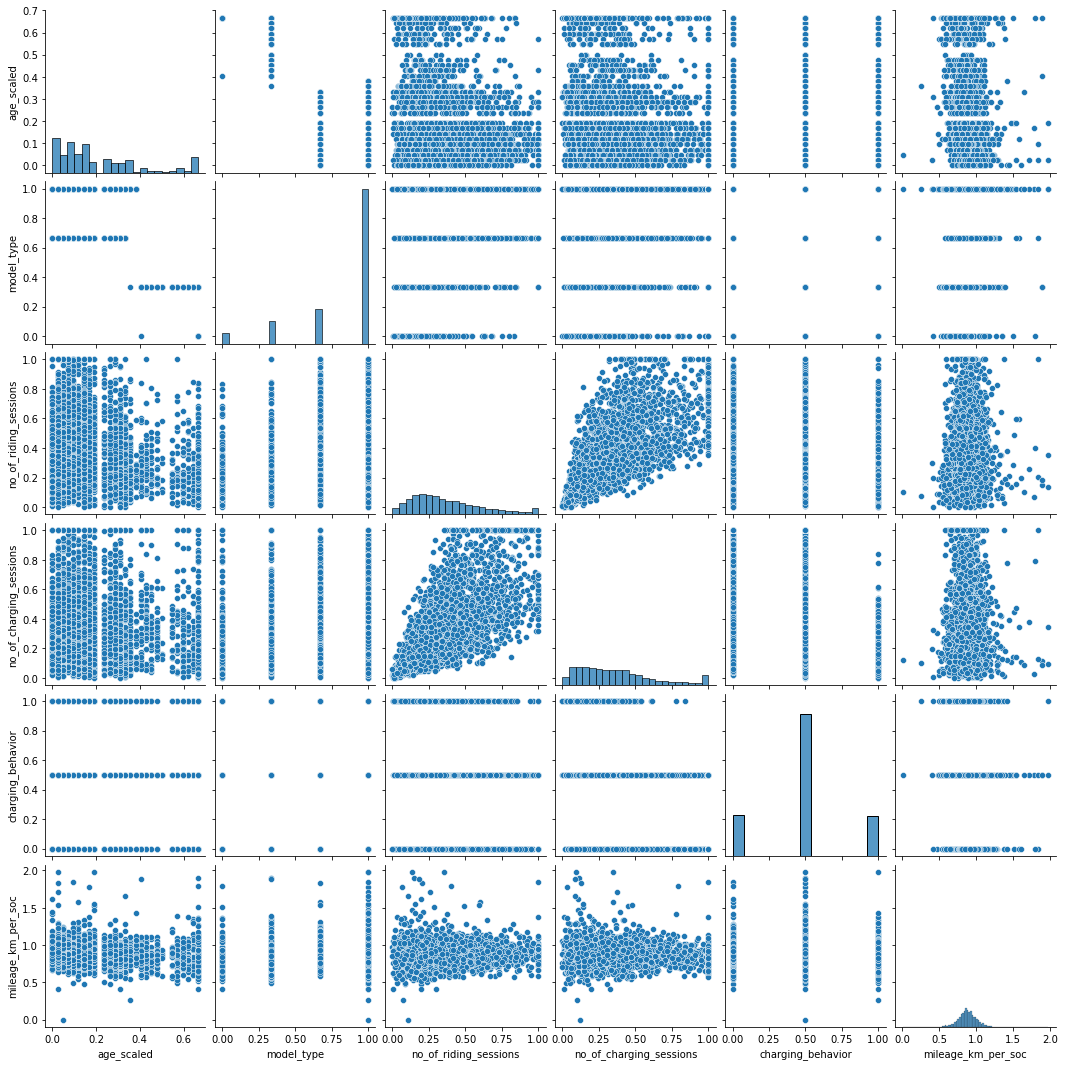

In [337]:
sns.pairplot(df_mod)

In [345]:
X1 = X.drop(columns='no_of_charging_sessions',axis=1)
X1

,age_scaled,model_type,no_of_riding_sessions,charging_behavior
0,0.261905,1.0,0.126668,0.5
1,0.261905,1.0,0.055073,0.5
2,0.261905,1.0,0.085999,0.0
3,0.261905,1.0,0.091082,1.0
4,0.261905,1.0,0.750688,1.0
...,...,...,...,...
2843,0.261905,1.0,0.000000,0.0
2844,0.261905,1.0,0.648591,0.0
2845,0.261905,1.0,0.031349,0.5
2846,0.666667,0.0,0.480830,0.5


In [346]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)
rf.fit(X1_train,y_train)

RandomForestRegressor()

In [348]:
y_pred = rf.predict(X1_test)

In [349]:
print('train score:', rf.score(X1_train,y_train)*100)
print('test score:', rf.score(X1_test,y_test)*100)

train score: 80.91104776946564
test score: -35.93594754267846


In [1]:
X1

NameError: name 'X1' is not defined